# **Project Name**    -  **AirBnb Bookings Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual


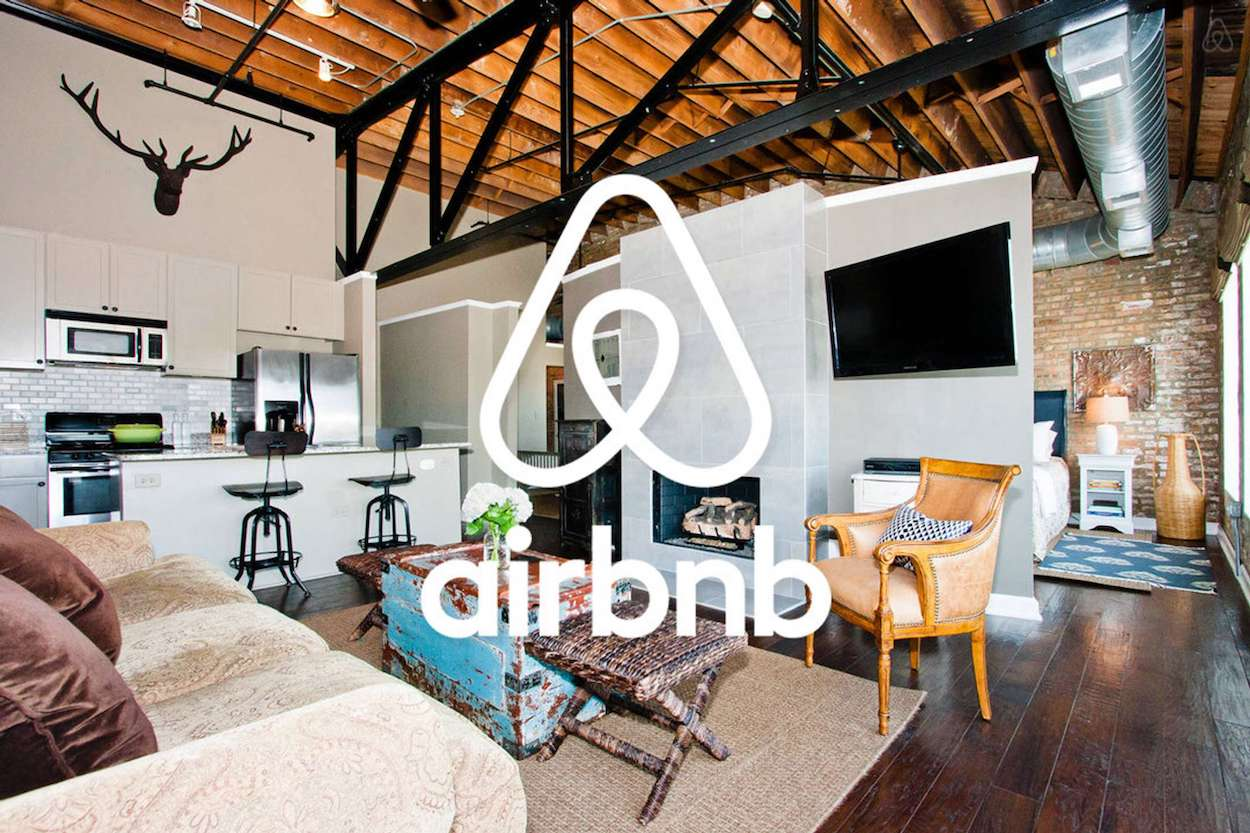

# **Project Summary -**

This project aims to do exploratory data analysis of the listings on Airbnb. Airbnb has a global reach, and data analysis plays a crucial role in its operations. Millions of listings on Airbnb generate vast amounts of data that can be used for security, business decisions, understanding customer and provider behavior, innovation, marketing initiatives, and more. The project focuses on utilizing historical data of Airbnb listings in New York as it is highlighted as one of the most popular places for tourism and business.

* There were approximately 48895 records and 16 attributes in the dataset.
* We started by importing the dataset, and necessary libraries to understand the variables.
* We conducted exploratory data analysis (EDA) to get a clear insight into each feature by separating the dataset into numeric and categoric features. We did Univariate, Bivariate, and even multivariate analyses.
*  After that, the outliers and null values were removed from the raw data and treated. Data were transformed to ensure that it was compatible with model building and predictions if required.

# **Index**

1.   Problem Statement
2.   Know Your Data
3.   Understanding Your Variables
4.   EDA
5.   Data Cleaning
6.   Conclusion

# **Let's Begin !**

## **1. Problem Statement**

Airbnb is a popular online marketplace connecting homeowners who want to rent out their homes with travelers seeking accommodations in a specific location. Airbnb offers people an easy, relatively stress-free way to earn some income from their property. New York City is highlighted as one of the most popular places for tourism and business. Since its launch in 2008, Airbnb has expanded the possibilities of travel and offers a unique and personalized way of experiencing the world.

Airbnb makes the bulk of its revenue by charging a service fee for each booking. Guests often find Airbnb is cheaper, has more character, and is homier than hotels. In this project, we are finding the followings:

*  Do the EDA of the given dataset using Numpy and Pandas, and find the relationship between different variables.
* Find out features that are important for Airbnb from a business perspective.
* Do the cost and revenue analysis and find out groups where Airbnb can focus to increase its profit.
* Analyze the sentiment from ratings of the customers. Find out the relationship between price and user's rating if there is any.

### **Business Context**

The business context of this project is the popularity and success of Airbnb. Airbnb is an innovative service that has transformed the travel and hospitality industry by providing unique, personalized experiences for travelers and a hassle-free way for homeowners to monetize their properties.

Data analysis is a crucial element of Airbnb's business, allowing the company to make informed decisions, ensure security, and innovate in response to customer and provider behavior.

## **2. Know Your Data**

### Import Libraries

In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# to set max column display
pd.pandas.set_option('display.max_columns',None)

### Dataset Loading

In [ ]:
# load the airbnb nyc 2019 data set from the drive
airbnb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Docs/Airbnb Bookings Analysis - Navneet Keshri/Airbnb NYC 2019 dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Project Docs/Airbnb Bookings Analysis - Navneet Keshri/Airbnb NYC 2019 dataset.csv'

### Dataset First View

In [ ]:
# Viewing the top 5 rows to take a glimpse of the data
airbnb.head()

### Dataset Rows & Columns Count

In [ ]:
# Dataset Rows & Columns
airbnb.shape

In [ ]:
print(f'number of rows : {airbnb.shape[0]}  \nnumber of columns : {airbnb.shape[1]}')

### Dataset Information

In [ ]:
# Dataset Info
airbnb.info()

We have  48895 rows and 16 columns in our dataset. Most of them are numeric with int64 and float64 type.

### Duplicate Values

**How important is it to get rid of duplicate records in my data?**

When there are identical instances in a dataset, it is referred to as "duplication." Such duplication could occur due to erroneous data entry or data collection procedures. Eliminating duplicate data from the dataset saves time and money by avoiding the repetition of the same data.

In [ ]:
# Dataset Duplicate Value Count
# Checking Duplicate Values
value = len(airbnb[airbnb.duplicated()])
print("The number of duplicate values in the data set is = ",value)

We found that there is no duplicate entry in the above data.

### Missing Values/Null Values

**Why dealing with missing values is necessary?**

Real-world data often contains numerous missing values, which can be due to data corruption or other factors. As many machine-learning algorithms do not support missing values, it is necessary to handle them during the dataset pre-processing stage. Thus, the first step in dealing with missing data is to identify the missing values.

In [ ]:
# Missing Values/Null Values Count
print(airbnb.isnull().sum())

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(airbnb, color='green',sort='ascending', figsize=(10,3), fontsize=15)

In [ ]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(airbnb.isna(), cmap = 'coolwarm')

From the above command, we noticed that we have some null values in the name, host_name, last_review, and reviews_per_month columns. We will treat them later.

### What did you know about your dataset?

The dataset provided contains 16 columns and 48895 rows. Our data has missing values in some columns but does not have any duplicate values.

## **3. Understanding Your Variables**

###  Columns

In [ ]:
# Dataset Columns
airbnb.columns

###  Statistical Summary

In [ ]:
# Dataset Describe
airbnb.describe(include = 'all').T

###  Variables Description

The dataset contains information about host and guest names and bookings done by them

<b>Attribute Information: </b>

* **id :** a unique identifier.
* **name :** hotel or apartment name.
* **host_id :** assigned id to host  (considering different hotels for the
same host_id because of location)
* **host_name :** the name of the host (one person can stay in a different hotel/apartment)
* **neighbourhood_group :** an area where the hotel belongs to (5 groups - Manhattan, Brooklyn, Queens, Bronx, Staten Island)
* **neighbourhood :** many sub-areas belong to 5 groups where hotels are situated (consider as towns under the district)
* **latitude :** latitude coordinates for the location of the hotel.
* **longitude :** longitude coordinates for the location of the hotel.
* **room_type :** 3 types of rooms which are (entire home/apt, private room, shared room)
* **price :** from 0 to 10000$
* **minimum_nights :** ranging from 1 to 1250.
* **number_of_reviews :** number of reviews for the hotel by users.
* **last_review :** last date when a hotel/apartment is reviewed by the user.
* **reviews_per_month :** how many reviews the hotel gets per month.
* **calculated_host_listings_count :** Number of times the listing is done by a particular host (count of aparticular hotel name in the data rows)
* **availability_365 :** values ranged from 0 to 365 as per the availability (number of days in a year)

### Unique Values

In [ ]:
# print the unique value
airbnb.nunique()

In [ ]:
# Check Unique Values for each variable.
for i in airbnb.columns.tolist():
  print("No. of unique values in ",i,"is",airbnb[i].nunique())

### Observations:

* We are focusing on several key columns of our dataset, including  'host_name', 'neighbourhood_group', 'neighbourhoood', 'room_type', 'price', 'minimum_nights', and 'number_of_reviews' as they contain a wealth of information.

## **4. EDA**

### **What is EDA?**
* Exploratory Data Analysis (EDA) is a critical step in the data science process that involves analyzing and understanding the data. The primary objective of EDA is to gain insights into the data, uncover patterns, and detect relationships and trends. This iterative process helps identify outliers, missing values, and other issues that may impact the analysis and modeling of the data.


### **4.1 Column: 'name'**

In [ ]:
# Most listed Hotel Name present in Newyork
name = airbnb['name'].value_counts()[:10].plot(kind='barh', figsize = (10,5))
name.set_title('Most listed Hotel Name present in Newyork', size=15)

**Observation:**
* With a total of 18 listings, the Hillside Hotel is the most popular in Newyork.

### **4.2 Column: 'host_name'**

In [ ]:
# Most listed Host Name present in Airbnb listings
host_name = airbnb['host_name'].value_counts()[:10].plot(kind='barh', figsize = (10,5))
host_name.set_title('Most listed Host Name', size=15)

**Observation:**
* Michael, David, and Sonder(NYC) are the 3 topmost listed hostnames.

### **4.3 Column: 'neighbourhood_group'**

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# countplot
graph = sns.countplot(data=airbnb, x='neighbourhood_group', ax=ax[0])
graph.set_title('Count Plot of Neighbourhood Group', size=20)

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# piechart
airbnb['neighbourhood_group'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6))
plt.title('Percentage Distribution of Neighbourhood Group', size=20)

# Bi-variate analysis
# Neighbourhood Group Vs Price
bar = sns.barplot(data=airbnb, x='neighbourhood_group', y='price', ax = ax[2])
bar.set(xlabel='Neighbourhood Group', ylabel='Price', title='Neighbourhood Group Vs Price')

plt.tight_layout()
plt.show()

**Observations:**

* Manhattan has the most number of listings followed by Brooklyn and Queens, while Staten Island has the least number of listings.
* 85% of listing on Airbnb come from Manhattan and Brooklyn.
* Even with the high number of listings in Manhattan and Brooklyn, the average price of the hotel is also too high which indicates that the demand in these two areas is massive.

### **4.4 Column: 'neighbourhood'**

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

# Most listed Neighbourhood present in Airbnb listings
neighbourhood = airbnb['neighbourhood'].value_counts()[:10].plot(kind='barh', ax=ax[0])
neighbourhood.set_title('Top 10 Neighbourhood ', size=15)

# Bi-variate analysis
# Neighbourhood Vs Price
top15=airbnb.nlargest(15, 'price')
bar = sns.barplot(data=top15, x='neighbourhood', y='price', ax=ax[1])
bar.set(xlabel='Neighbourhood', ylabel='Price', title='Neighbourhood Vs Price (Top 15)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observations:**

* Williamsburg, Bedford-Stuyvesant, and Harlem are the most popular and have the most listings.
* Astoria, GreenPoint, and Upper West Side are the most costly neighborhoods in the dataset.

### **4.5 Columns: 'latitude and longitude'**

In [ ]:
# Location Coordinates for Airbnb listings
scatter = sns.scatterplot(x='latitude', y='longitude', hue='neighbourhood_group', data=airbnb)
scatter.set_title('Location Coordinates', size=15)

**Observations:**

* A scatter plot is used to visualize the locations of all the hotels listed in the dataset. Staten Island listings are sparsely separated from each other.
* Manhattan listings are the densest in the dataset.

### **4.6 Column: 'room_type'**

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# countplot
graph = sns.countplot(data=airbnb, x='room_type', ax=ax[0])
graph.set_title('Count Plot of Room Type', size=20)

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis
# Room Type Vs Price
bar = sns.barplot(data=airbnb, x='room_type', y='price', ax = ax[1])
bar.set(xlabel='Room Type', ylabel='Price', title='Room Type Vs Price')

# Multivariate analysis
# Room Type Vs Price with Neighbourhood Group
bar = sns.barplot(data=airbnb, x='neighbourhood_group', y='price', hue='room_type', ax = ax[2])
bar.set(xlabel='Room Type', ylabel='Price', title='Room Type Vs Price in different Neighbourhood Groups')

plt.tight_layout()
plt.show()

**Observations:**

* The entire home/apt is the most preferred room type in Airbnb and has the most number of listings, therefore.
* Due to the high demand for the entire home/apt it is the most costly one too followed by a private room.
* In all the neighborhood groups entire home/apt is the most costly which indicates its high demand all over Newyork.

### **4.7 Column: 'price'**

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
# Most preffered Price
alos = airbnb['price'].value_counts()[:10].plot(kind='barh', ax=ax[0])
alos.set(title='Most preffered Price (Top 10)', ylabel='Price')

# Univariate analysis
dist = sns.distplot(airbnb.price, ax = ax[1])
dist.set_title('Distribution Plot of Price')

# Bi-variate analysis
# Rented Bike Count Vs Price
scatter = sns.scatterplot(data=airbnb, x='neighbourhood_group', y='price', ax = ax[2])
scatter.set(xlabel='Price', ylabel='Neighbourhood Group', title='Price of all the listings over different Neighbourhood Groups')

plt.tight_layout()
plt.show()

**Observations:**
* The price of USD 100 and USD 150 for one night is highly preferred by customers.
* Price distribution is highly skewed to positive. Most of the price of all the listings belongs to 0 to 2000 USD.
* price of the listed properties varies from 0 to 10000 which indicated that there are many wrong entries and outliers in the price.


### **4.8 Column: 'minimum_nights'**

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
# Most preffered Length of Stay (ALOS)
alos = airbnb['minimum_nights'].value_counts()[:10].plot(kind='barh', ax=ax[0])
alos.set(title='Most preffered Length of Stay (ALOS)', ylabel='Minimum Nights')

# Bi-variate analysis
# Minimum Nights Vs Neighbourhood Group
bar = sns.barplot(data=airbnb, x='neighbourhood_group', y='minimum_nights', ax = ax[1])
bar.set(xlabel='Neighbourhood Group', ylabel='Average Length of Stay', title='Average Length of Stay in different Neighbourhood Groups')

# Bi-variate analysis
# Minimum Nights Vs Room Type
bar = sns.barplot(data=airbnb, x='room_type', y='minimum_nights', ax = ax[2])
bar.set(xlabel='Room Types', ylabel='Average Length of Stay', title='Average Length of Stay in different Room Types')

plt.tight_layout()
plt.show()

**Observations:**
* Most customers prefer to stay for 1,2 or 3 nights.
* Manhattan has a maximum average length of stay which is over 8 nights followed by Brooklyn which is over 6 nights. The Bronx has a minimum length of stay.
* The entire home/apt has a maximum average length of stay followed by a shared room.

### **4.9 Column: 'number_of_reviews'**

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Bi-variate analysis
# Most Rated Host Name
nor_host_name = airbnb[['number_of_reviews','host_name']].groupby('host_name').sum().sort_values(by='number_of_reviews', ascending=False)
top_10_nor = nor_host_name.head(10).reset_index()
nor = sns.barplot(x='host_name', y='number_of_reviews', data=top_10_nor, ax=ax[0])
nor.set(title='Most Rated Host Names (Top 10)', ylabel='Total no. of Reviews')

# Bi-variate analysis
# Most Rated Neighbourhood Group
nor_neighbourhood = airbnb[['number_of_reviews','neighbourhood_group']].groupby('neighbourhood_group').sum().reset_index()
bar = sns.barplot(data=nor_neighbourhood, x='neighbourhood_group', y='number_of_reviews', ax = ax[1])
bar.set(xlabel='Neighbourhood Group', ylabel='Number of Reviews', title='Total no. of Reviews in Neighbourhood Groups')

# Bi-variate analysis
# Most Rated Room Type
nor_room_type = airbnb[['number_of_reviews','room_type']].groupby('room_type').sum().reset_index()
bar = sns.barplot(data=nor_room_type, x='room_type', y='number_of_reviews', ax = ax[2])
bar.set(xlabel='Room Types', ylabel='Number of Reviews', title='Total no. of Reviews in different Room Types')

plt.tight_layout()
plt.show()

**Observations:**
* The top 3 most rated host names are Micheal, David, and John.
* Even though Manhattan has the maximum number of listings yet Brooklyn has the most number of reviews.
* The entire home/apt has the maximum number of reviews.

### **4.10 Column: 'availability_365'**

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
# Most Common Availability
count = airbnb['availability_365'].value_counts()[:10].plot(kind='barh', ax=ax[0])
count.set(title='Most common availability', ylabel='Availability')

# Bi-variate analysis
# Availability Vs Neighbourhood Group
bar = sns.barplot(data=airbnb, x='neighbourhood_group', y='availability_365', ax = ax[1])
bar.set(xlabel='Neighbourhood Group', ylabel='Availability', title='Availability in different Neighbourhood Groups')

# Bi-variate analysis
# Availability Vs Room Type
bar = sns.barplot(data=airbnb, x='room_type', y='availability_365', ax = ax[2])
bar.set(xlabel='Room Types', ylabel='Availability', title='Availability in different Room Types')

plt.tight_layout()
plt.show()

**Observations:**
* The most common availability days in the data is 0 which indicates the wrong entry in the dataset. It makes no sense that the hotel is not available for any day and still has customers listed.
* Hotels in Staten Island are most of the time available in an entire year.
* Shared Room is available for use the most number of the days in the year.

## **5. Data Cleaning**

#### **What is data cleaning?**
* Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and missing values in a dataset. It is an important step in the data preparation process that ensures that the data is accurate, complete, and in a format that can be easily analyzed. Data cleaning may include tasks such as removing duplicate records, filling in missing values, correcting errors, and standardizing data formats. The goal of data cleaning is to improve the quality of the data and make it suitable for further analysis and modeling.

### **5.1 Duplicate Values**

In [ ]:
# counting duplicate values
airbnb.duplicated().sum()

There is no duplicate record in the dataset.

### **5.2 Missing Values**

In [ ]:
# Missing Values/Null Values Count
print(airbnb.isnull().sum())

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(airbnb, color='green',sort='ascending', figsize=(10,3), fontsize=15)

* Null values are present in the 'last_review', 'reviews_per_month', 'host_name', and 'name' columns.

In [ ]:
# Missing Values Percentage
round(airbnb.isna().sum()/len(airbnb)*100, 2)

In [ ]:
# checking the shape of the data before missing value treatment
airbnb.shape

**Handling Missing Values**
* Typically, we use other records to replace these null values. We will remove rows with any null value if the null values in the column are less than 5% and impute the null values with mean or median if the null value percentage in the column is more than 5%. This is the most logical choice we have for dealing with such values.

* Since 'name' and 'host_name' has less than 5% missing value percentage hence we are removing the null values of these two features.

* 'last_review' and 'reviews_per_month' has a lot of null values which account for more than 20% of the data and we have not used these two columns for our EDA. These two columns do not even provide meaningful information hence the most logical choice is to remove these two columns to make the dataset clean.

In [ ]:
# features which has less than 5%  null values present. ( Dropping rows)
nan_columns = ['name', 'host_name']

# dropping null values
airbnb.dropna(subset=nan_columns, inplace=True)

In [ ]:
# features which has more than 5%  null values present. ( Dropping column in this case)
columns_to_drop = ['last_review', 'reviews_per_month']

# dropping null values
airbnb.drop('last_review', axis=1, inplace=True)
airbnb.drop('reviews_per_month', axis=1, inplace=True)

In [ ]:
# Checking again missing values/null values Count
print(airbnb.isnull().sum())

In [ ]:
# checking the shape of the data after missing values treatment
airbnb.shape

### **5.3 Skewness**

In [ ]:
# statistical summary
airbnb.describe().T

As can be seen in the statistical summary for numerical features, there is a significant difference between the 75% percentile and maximum value, indicating that the dataset contains skewness and outliers.

In [ ]:
numerical_features =['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']

In [ ]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Data distibution in numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(1, 5, i+1)                      # subplots of 1 rows and 5 columns

  # distplot
  sns.distplot(airbnb[col])
  # mean line
  plt.axvline(airbnb[col].mean(), color='blue', linestyle='dashed', linewidth=2)
  # median line
  plt.axvline(airbnb[col].median(), color='red', linestyle='dashed', linewidth=2)
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

**Observation:**
* For numerical features, we can see that the majority of distributions are right-skewed.

* Some of the variables can get a normal distribution when outliers are removed. As a result, it appears that outliers should be removed before the transformation. First, we get rid of outliers, and then we check to see if we need to use the transformation technique again.

### **5.4 Treating Outliers**

In [ ]:
# figsize
plt.figure(figsize=(15,5))
# boxplot of numerical features
sns.boxplot(data=airbnb[numerical_features])
plt.show()

**Clipping Method:** In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

In [ ]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(airbnb):
    for col in airbnb[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = airbnb[col].quantile(0.25)
        q3 = airbnb[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        airbnb[col] = airbnb[col].clip(lower_bound, upper_bound)
    return airbnb

In [ ]:
# using the function to treat outliers
airbnb = clip_outliers(airbnb)

In [ ]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,5))
# boxplot of numerical features
sns.boxplot(data=airbnb[numerical_features])
plt.show()

In [ ]:
# checking for distribution after treating outliers.
for col in numerical_features:
  fig, ax =plt.subplots(1,2, figsize=(15,3))
  sns.distplot(airbnb[col], ax=ax[0]).set(title="Distribution")
  sns.boxplot(airbnb[col], ax=ax[1]).set(title="Box Plot")
  plt.suptitle(f'{col.title()}',weight='bold')
  plt.tight_layout()

* We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution.

## **6. Conclusion**

In this project, we tackled an Exploratory Data Analysis problem in which we had to explore and find the relationship between different variables to understand the business sense and let stakeholders make informed decisions.
Through this Exploratory Data Analysis (EDA) we analyzed Airbnb Bookings Analysis using Pandas and used Seaborn and Matplotlib for the visualization.
* There were approximately 48895 records and 16 attributes in the dataset.
* We started by importing the dataset, and necessary libraries to understand the variables.
* We conducted exploratory data analysis (EDA) to get a clear insight into each feature by separating the dataset into numeric and categoric features. We did Univariate, Bivariate, and even multivariate analyses.
*  After that, the outliers and null values were removed from the raw data and treated. Data were transformed to ensure that it was compatible with model building and predictions if required.

### **Major Findings**:
* With a total of 18 listings, the Hillside Hotel is the most listed in Newyork. Michael, David, and Sonder(NYC) are the 3 topmost listed hostnames.

* Manhattan has the most number of listings followed by Brooklyn and Queens, while Staten Island has the least number of listings. 85% of listing on Airbnb come from Manhattan and Brooklyn. Even with the high number of listings in Manhattan and Brooklyn, the average price of the hotel is also too high which indicates that the demand in these two areas is massive.

* Williamsburg, Bedford-Stuyvesant, and Harlem are the most popular and have the most listings in the neighbourhood. Astoria, GreenPoint, and Upper West Side are the most costly neighborhoods in the dataset.

* Staten Island listings are sparsely separated from each other. Manhattan listings are the densest in the dataset.

* The entire home/apt is the most preferred room type in Airbnb and has the most number of listings. Due to the high demand for the entire home/apt it is the most costly one too followed by a private room. In all the neighborhood groups entire home/apt is the most costly which indicates its high demand all over Newyork.

* Price of USD 100 and USD 150 for one night is highly preferred by customers. The price of all the listings ranges from 0 to 2000 USD. The price of the listed properties varies from 0 to 10000 which indicated that there are many wrong entries and outliers in the price. (Assuming price cannot be zero)

* Most customers prefer to stay for 1,2 or 3 nights. Manhattan has a maximum average length of stay which is over 8 nights followed by Brooklyn which is over 6 nights. The Bronx has a minimum length of stay. The entire home/apt has a maximum average length of stay followed by a shared room.

* The top 3 most rated host names are Micheal, David, and John.
Even though Manhattan has the maximum number of listings yet Brooklyn has the most number of reviews.

* The most common availability days in the data is 0 which indicates the wrong entry in the dataset. It makes no sense that the hotel is not available for any day and still has customers listed. Hotels in Staten Island are most of the time available in an entire year. Shared Room is available for use the most number of the days in the year.

## **Hurrah! We have completed Our EDA Capstone Project !!!**